# Function Transformer
using this we can perform several types of mathematical transformations like Log transform, Reciprocal transform, sq/sqrt transform, Custom transform to data, 

# Log Tranfrom :- It is mostly applied to right skewed data to shift the data to the centre. Not applied to negative vals.
# Reciprocal (1/x) transform , Square (x^2) Transform-for left skewed data, square root (x^1/2) transform

In [48]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [49]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [50]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [51]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/var/folders/55/mhy5dtxs1g11qqd33n2hv53h0000gn/T/ipykernel_3237/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [52]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [53]:
df.sample(5)

,Survived,Age,Fare
614,0,35.000000,8.0500
840,0,20.000000,7.9250
358,1,29.699118,7.8792
623,0,21.000000,7.8542
355,0,28.000000,9.5000


In [54]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((712, 2), (179, 2), (712,), (179,))

/var/folders/55/mhy5dtxs1g11qqd33n2hv53h0000gn/T/ipykernel_3237/2565996168.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


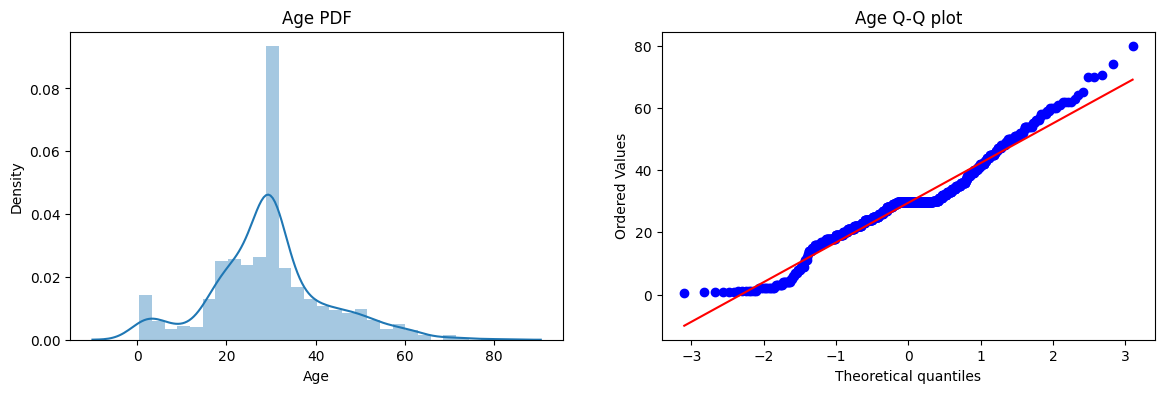

In [56]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age Q-Q plot')
plt.show()

/var/folders/55/mhy5dtxs1g11qqd33n2hv53h0000gn/T/ipykernel_3237/2221139244.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


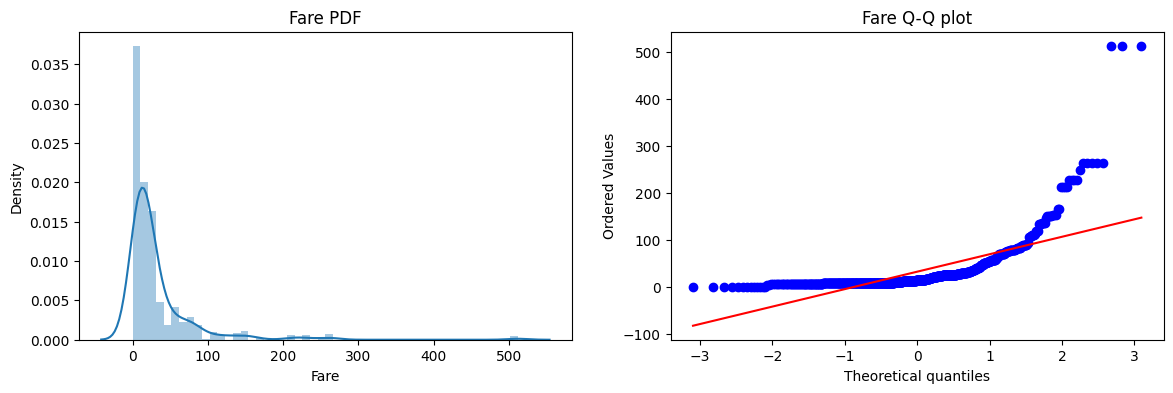

In [57]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Q-Q plot')
plt.show()

This is right skewed, so we will use log transform here

In [58]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [59]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y1_pred = clf1.predict(X_test)
y2_pred = clf2.predict(X_test)

print('Logistic Regression accuracy:',accuracy_score(y_test,y1_pred))
print('Decision Tree accuracy:',accuracy_score(y_test,y2_pred))

Logistic Regression accuracy: 0.6480446927374302
Decision Tree accuracy: 0.6927374301675978


In [60]:
y.shape

(891,)

In [62]:
# Log Transformation

trf = FunctionTransformer(np.log1p)

In [63]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)


In [64]:
clf1.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y1_pred = clf1.predict(X_test_transformed)
y2_pred = clf2.predict(X_test_transformed)

print('Logistic Regression accuracy:',accuracy_score(y_test,y1_pred))
print('Decision Tree accuracy:',accuracy_score(y_test,y2_pred))

Logistic Regression accuracy: 0.6815642458100558
Decision Tree accuracy: 0.6759776536312849


In [65]:
X_transformed = trf.fit_transform(X)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf1,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6599999999999999


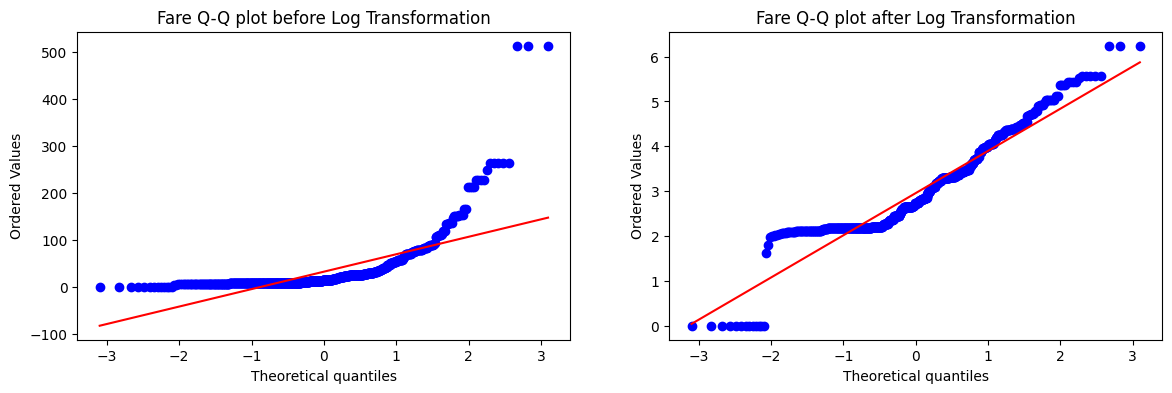

In [66]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Q-Q plot before Log Transformation')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare Q-Q plot after Log Transformation')

plt.show()


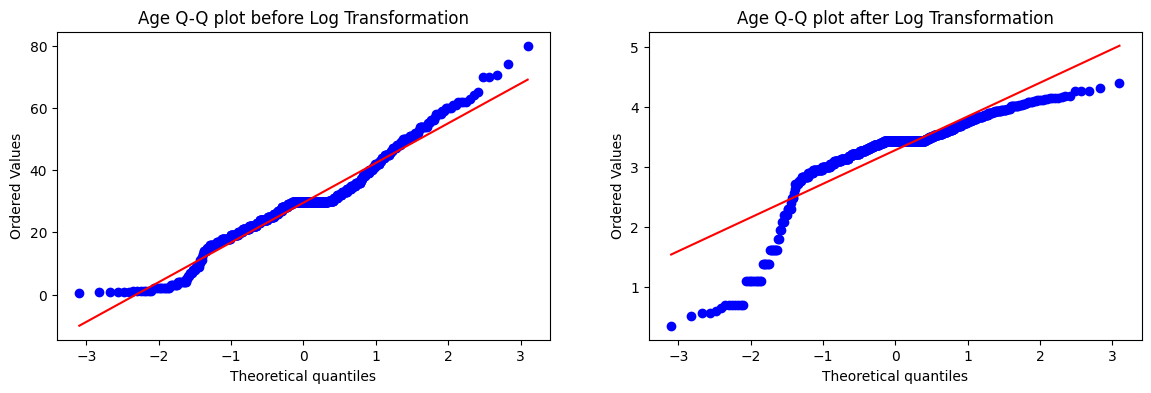

In [67]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age Q-Q plot before Log Transformation')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age Q-Q plot after Log Transformation')

plt.show()


From above plots it can be observed that log transformation worked better on Fare(as it was right skewed), but i did not worked well on age. So lets apply log transformtion on Fare coloumn only

In [68]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [69]:
clf1.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y1_pred = clf1.predict(X_test_transformed2)
y2_pred = clf2.predict(X_test_transformed2)

print('Logistic Regression accuracy:',accuracy_score(y_test,y1_pred))
print('Decision Tree accuracy:',accuracy_score(y_test,y2_pred))

Logistic Regression accuracy: 0.6703910614525139
Decision Tree accuracy: 0.6703910614525139


In [70]:
X_transformed2 = trf2.fit_transform(X)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf1,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6633208489388265


In [74]:
def apply_transform(transform):
    X=df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'],dist='norm',plot=plt)
    plt.title('Fare Q-Q plot before Transformation')
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist='norm',plot=plt)
    plt.title('Fare Q-Q plot after Transformation')
    
    plt.show()

Accuracy 0.6589013732833957


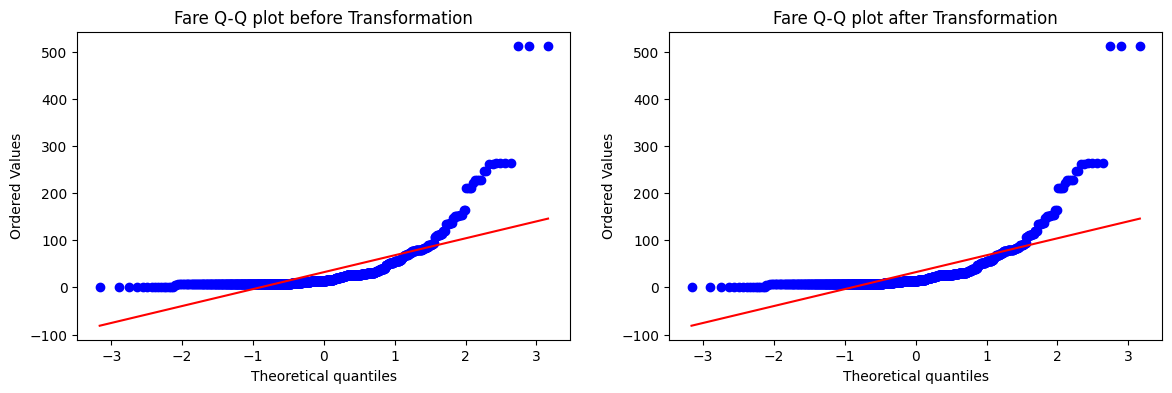

In [75]:
apply_transform(lambda x: x)

Accuracy 0.6431335830212235


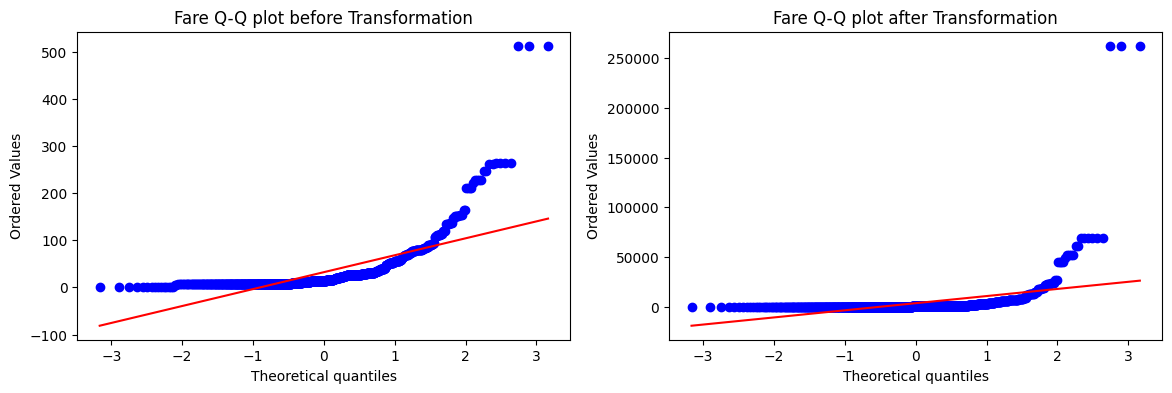

In [76]:
# X-squared Transformation
apply_transform(lambda x: np.power(x,2))

Accuracy 0.6611485642946316


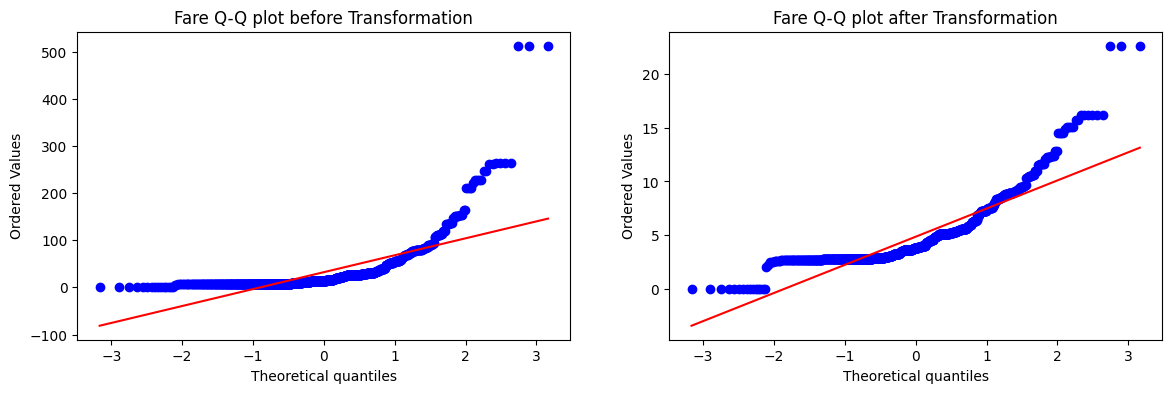

In [77]:
# Square-root Transformation
apply_transform(lambda x: np.sqrt(x))